Loading functions

In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
from dual import *

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### airline data prep

In [2]:
#data_airline = pd.read_csv('airline_data.csv').dropna().sample(500)
#save_file('airline_500', data_airline)
data_airline = load_file('airline_500')


In [3]:
data_size = len(data_airline.index)

air_X = data_airline.iloc[:, :-1]
air_y = data_airline.iloc[:, -1]

sat_encoder = LabelEncoder()
air_y = np.array(sat_encoder.fit_transform(air_y))
air_y = air_y * 2 - 1

air_X['Gender'] = sat_encoder.fit_transform(air_X.Gender.values)
air_X['Customer Type'] = sat_encoder.fit_transform(air_X['Customer Type'].values)
air_X['Type of Travel'] = sat_encoder.fit_transform(air_X['Type of Travel'].values)
air_X['Class'] = sat_encoder.fit_transform(air_X['Class'].values)

air_X = air_X.drop(labels=["Unnamed: 0"], axis=1)
air_X = air_X.drop(labels=["id"], axis=1)

air_X = air_X[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance',
       'Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(air_X)
air_X = np.array(scaler.transform(air_X))
air_X = air_X[:,0:12]

# Calculating rademacher for different bounds / margins

In [7]:
BOUNDS = np.array([1e-12, 0.5, 1.0])
MARGINS = np.array([0.0]) # np.array([0, 0.5, 1.0, 2.0])

PUMP_X = air_X
PUMP_Y = air_y

runs_per_sample = 5
maxiter = 100
init_temp = 5500
accept = -5

pump_cycles = 500

In [8]:
for pc in range(pump_cycles):
    # generate rademacher vector
    radvec = [rd.randint(0, 1) * 2 - 1 for x in range(PUMP_X.shape[0])]

    print('\n', pc, '///')

    for b in BOUNDS:
        ## Calculate Confidence Rademacher Complexity
        DATA_SAVE_NAME = "histories/RM_dynamics_air/air500_12_maxiter100_confidence_b"+str(b)

        try:
            history = load_file(DATA_SAVE_NAME)
        except:
            print('creating new file')
            history = RDhistory('confidence')

        pump_rademacher(PUMP_X, PUMP_Y,
                        history=history,
                        radvec=radvec,
                        runs_per_sample=1,
                        margin=1.0, bounds=b,
                        verbose=False)

        save_file(DATA_SAVE_NAME, history)

        ## Calculate Margin loss Rademacher Complexity for all the margins
        for mar in MARGINS:
            # print(mar, end=' ')

            DATA_SAVE_NAME = "histories/RM_dynamics_air/air500_12_maxiter100_margin_loss_b" + str(b) + '_m' + str(mar)

            try:
                history = load_file(DATA_SAVE_NAME)
            except:
                print('new file', end=' ')
                history = RDhistory('margin_loss')

            pump_rademacher(PUMP_X, PUMP_Y,
                            history=history,
                            radvec=radvec,
                            runs_per_sample=runs_per_sample,
                            margin=mar, bounds=b,
                            verbose=False,
                            method='da', kwargs={'maxiter':maxiter, 'initial_temp':init_temp, 'accept':accept})

            save_file(DATA_SAVE_NAME, history)


 0 ///
b:  1e-12 	m:  1.0 	c:  53.16517127720625
b:  1e-12 	m:  0.0 	c:  42.0
b:  0.5 	m:  1.0 	c:  62.56982451141005
b:  0.5 	m:  0.0 	c:  38.0
b:  1.0 	m:  1.0 	c:  71.97447774563263
b:  1.0 	m:  0.0 	c:  44.0

 1 ///
b:  1e-12 	m:  1.0 	c:  43.32666610966635
b:  1e-12 	m:  0.0 	c:  37.0
b:  0.5 	m:  1.0 	c:  89.48761454123867
b:  0.5 	m:  0.0 	c:  38.0
b:  1.0 	m:  1.0 	c:  135.64856297290333
b:  1.0 	m:  0.0 	c:  37.0

 2 ///
b:  1e-12 	m:  1.0 	c:  86.68473343009224
b:  1e-12 	m:  0.0 	c:  21.0
b:  0.5 	m:  1.0 	c:  213.5813571462079
b:  0.5 	m:  0.0 	c:  22.0
b:  1.0 	m:  1.0 	c:  340.47798086257734
b:  1.0 	m:  0.0 	c:  20.0

 3 ///
b:  1e-12 	m:  1.0 	c:  74.65506696804407
b:  1e-12 	m:  0.0 	c:  16.0
b:  0.5 	m:  1.0 	c:  215.3019168933554
b:  0.5 	m:  0.0 	c:  21.0
b:  1.0 	m:  1.0 	c:  355.9487668189481
b:  1.0 	m:  0.0 	c:  21.0

 4 ///
b:  1e-12 	m:  1.0 	c:  54.01477329111997
b:  1e-12 	m:  0.0 	c:  40.0
b:  0.5 	m:  1.0 	c:  81.78495371776155
b:  0.5 	m:  0.0 	c:  42.0


b:  1e-12 	m:  0.0 	c:  34.0
b:  0.5 	m:  1.0 	c:  155.59611728328747
b:  0.5 	m:  0.0 	c:  37.0
b:  1.0 	m:  1.0 	c:  240.64248113433268
b:  1.0 	m:  0.0 	c:  34.0

 39 ///
b:  1e-12 	m:  1.0 	c:  42.140537296248716
b:  1e-12 	m:  0.0 	c:  42.0
b:  0.5 	m:  1.0 	c:  65.8706571323844
b:  0.5 	m:  0.0 	c:  37.0
b:  1.0 	m:  1.0 	c:  89.60077696856752
b:  1.0 	m:  0.0 	c:  39.0

 40 ///
b:  1e-12 	m:  1.0 	c:  47.996919706277495
b:  1e-12 	m:  0.0 	c:  39.0
b:  0.5 	m:  1.0 	c:  100.08359558671847
b:  0.5 	m:  0.0 	c:  42.0
b:  1.0 	m:  1.0 	c:  152.1702714672637
b:  1.0 	m:  0.0 	c:  41.0

 41 ///
b:  1e-12 	m:  1.0 	c:  68.37972644880033
b:  1e-12 	m:  0.0 	c:  68.0
b:  0.5 	m:  1.0 	c:  192.685576171354
b:  0.5 	m:  0.0 	c:  62.0
b:  1.0 	m:  1.0 	c:  316.9914258941563
b:  1.0 	m:  0.0 	c:  62.0

 42 ///
b:  1e-12 	m:  1.0 	c:  32.35775050370322
b:  1e-12 	m:  0.0 	c:  38.0
b:  0.5 	m:  1.0 	c:  109.61899274366743
b:  0.5 	m:  0.0 	c:  43.0
b:  1.0 	m:  1.0 	c:  186.8802349837864
b:  

b:  0.5 	m:  0.0 	c:  40.0
b:  1.0 	m:  1.0 	c:  109.61846569516787
b:  1.0 	m:  0.0 	c:  39.0

 77 ///
b:  1e-12 	m:  1.0 	c:  61.1168846856935
b:  1e-12 	m:  0.0 	c:  41.0
b:  0.5 	m:  1.0 	c:  77.47897521339704
b:  0.5 	m:  0.0 	c:  38.0
b:  1.0 	m:  1.0 	c:  93.8410657411333
b:  1.0 	m:  0.0 	c:  41.0

 78 ///
b:  1e-12 	m:  1.0 	c:  62.20588434638364
b:  1e-12 	m:  0.0 	c:  50.0
b:  0.5 	m:  1.0 	c:  150.62195716320517
b:  0.5 	m:  0.0 	c:  50.0
b:  1.0 	m:  1.0 	c:  239.03802998020348
b:  1.0 	m:  0.0 	c:  50.0

 79 ///
b:  1e-12 	m:  1.0 	c:  35.33241679588403
b:  1e-12 	m:  0.0 	c:  45.0
b:  0.5 	m:  1.0 	c:  120.2402796612937
b:  0.5 	m:  0.0 	c:  47.0
b:  1.0 	m:  1.0 	c:  205.14814252687324
b:  1.0 	m:  0.0 	c:  48.0

 80 ///
b:  1e-12 	m:  1.0 	c:  51.23361274827521
b:  1e-12 	m:  0.0 	c:  27.0
b:  0.5 	m:  1.0 	c:  168.344229746828
b:  0.5 	m:  0.0 	c:  32.0
b:  1.0 	m:  1.0 	c:  285.4548467456151
b:  1.0 	m:  0.0 	c:  34.0

 81 ///
b:  1e-12 	m:  1.0 	c:  66.4355863116097

b:  1.0 	m:  0.0 	c:  54.0

 115 ///
b:  1e-12 	m:  1.0 	c:  21.21425238053099
b:  1e-12 	m:  0.0 	c:  52.0
b:  0.5 	m:  1.0 	c:  44.78331298334422
b:  0.5 	m:  0.0 	c:  45.0
b:  1.0 	m:  1.0 	c:  68.35237358620464
b:  1.0 	m:  0.0 	c:  45.0

 116 ///
b:  1e-12 	m:  1.0 	c:  55.82050340581551
b:  1e-12 	m:  0.0 	c:  54.0
b:  0.5 	m:  1.0 	c:  73.73506775018615
b:  0.5 	m:  0.0 	c:  45.0
b:  1.0 	m:  1.0 	c:  91.64963209459265
b:  1.0 	m:  0.0 	c:  41.0

 117 ///
b:  1e-12 	m:  1.0 	c:  86.16122405258244
b:  1e-12 	m:  0.0 	c:  33.0
b:  0.5 	m:  1.0 	c:  161.60119222238893
b:  0.5 	m:  0.0 	c:  37.0
b:  1.0 	m:  1.0 	c:  237.04116039234628
b:  1.0 	m:  0.0 	c:  30.0

 118 ///
b:  1e-12 	m:  1.0 	c:  53.0784128962204
b:  1e-12 	m:  0.0 	c:  39.0
b:  0.5 	m:  1.0 	c:  100.1785401153117
b:  0.5 	m:  0.0 	c:  33.0
b:  1.0 	m:  1.0 	c:  147.27866733449721
b:  1.0 	m:  0.0 	c:  38.0

 119 ///
b:  1e-12 	m:  1.0 	c:  38.42031345837114
b:  1e-12 	m:  0.0 	c:  48.0
b:  0.5 	m:  1.0 	c:  77.46216

b:  1e-12 	m:  0.0 	c:  41.0
b:  0.5 	m:  1.0 	c:  47.32014625574787
b:  0.5 	m:  0.0 	c:  40.0
b:  1.0 	m:  1.0 	c:  63.24723416338884
b:  1.0 	m:  0.0 	c:  34.0

 154 ///
b:  1e-12 	m:  1.0 	c:  39.359740533924324
b:  1e-12 	m:  0.0 	c:  46.0
b:  0.5 	m:  1.0 	c:  52.06307630841627
b:  0.5 	m:  0.0 	c:  36.0
b:  1.0 	m:  1.0 	c:  64.76641208293368
b:  1.0 	m:  0.0 	c:  46.0

 155 ///
b:  1e-12 	m:  1.0 	c:  36.65616180671908
b:  1e-12 	m:  0.0 	c:  54.0
b:  0.5 	m:  1.0 	c:  91.21724789498906
b:  0.5 	m:  0.0 	c:  53.0
b:  1.0 	m:  1.0 	c:  145.7783339833681
b:  1.0 	m:  0.0 	c:  52.0

 156 ///
b:  1e-12 	m:  1.0 	c:  43.12655542313397
b:  1e-12 	m:  0.0 	c:  43.0
b:  0.5 	m:  1.0 	c:  77.90790963244295
b:  0.5 	m:  0.0 	c:  45.0
b:  1.0 	m:  1.0 	c:  112.6892638418216
b:  1.0 	m:  0.0 	c:  45.0

 157 ///
b:  1e-12 	m:  1.0 	c:  47.522634466067856
b:  1e-12 	m:  0.0 	c:  32.0
b:  0.5 	m:  1.0 	c:  110.65044784821598
b:  0.5 	m:  0.0 	c:  38.0
b:  1.0 	m:  1.0 	c:  173.77826123049022


b:  1e-12 	m:  0.0 	c:  12.0
b:  0.5 	m:  1.0 	c:  227.98122554894573
b:  0.5 	m:  0.0 	c:  14.0
b:  1.0 	m:  1.0 	c:  364.1947949381408
b:  1.0 	m:  0.0 	c:  10.0

 192 ///
b:  1e-12 	m:  1.0 	c:  74.42333173721926
b:  1e-12 	m:  0.0 	c:  87.0
b:  0.5 	m:  1.0 	c:  208.78979675016745
b:  0.5 	m:  0.0 	c:  78.0
b:  1.0 	m:  1.0 	c:  343.15626176338435
b:  1.0 	m:  0.0 	c:  89.0

 193 ///
b:  1e-12 	m:  1.0 	c:  38.7020329427909
b:  1e-12 	m:  0.0 	c:  50.0
b:  0.5 	m:  1.0 	c:  77.45968689387135
b:  0.5 	m:  0.0 	c:  52.0
b:  1.0 	m:  1.0 	c:  116.21734084502931
b:  1.0 	m:  0.0 	c:  53.0

 194 ///
b:  1e-12 	m:  1.0 	c:  85.81669601387753
b:  1e-12 	m:  0.0 	c:  27.0
b:  0.5 	m:  1.0 	c:  219.82325341097464
b:  0.5 	m:  0.0 	c:  26.0
b:  1.0 	m:  1.0 	c:  353.82981080833974
b:  1.0 	m:  0.0 	c:  22.0

 195 ///
b:  1e-12 	m:  1.0 	c:  56.82511485637747
b:  1e-12 	m:  0.0 	c:  34.0
b:  0.5 	m:  1.0 	c:  206.4068626717767
b:  0.5 	m:  0.0 	c:  39.0
b:  1.0 	m:  1.0 	c:  355.9886104874749

b:  1e-12 	m:  0.0 	c:  64.0
b:  0.5 	m:  1.0 	c:  206.5748967844137
b:  0.5 	m:  0.0 	c:  65.0
b:  1.0 	m:  1.0 	c:  350.7071367096029
b:  1.0 	m:  0.0 	c:  64.0

 230 ///
b:  1e-12 	m:  1.0 	c:  42.38791324963455
b:  1e-12 	m:  0.0 	c:  42.0
b:  0.5 	m:  1.0 	c:  89.57117486060088
b:  0.5 	m:  0.0 	c:  39.0
b:  1.0 	m:  1.0 	c:  136.7544364716615
b:  1.0 	m:  0.0 	c:  37.0

 231 ///
b:  1e-12 	m:  1.0 	c:  42.037613257891486
b:  1e-12 	m:  0.0 	c:  49.0
b:  0.5 	m:  1.0 	c:  42.037613257891486
b:  0.5 	m:  0.0 	c:  52.0
b:  1.0 	m:  1.0 	c:  42.037613257891486
b:  1.0 	m:  0.0 	c:  54.0

 232 ///
b:  1e-12 	m:  1.0 	c:  41.78144860719288
b:  1e-12 	m:  0.0 	c:  39.0
b:  0.5 	m:  1.0 	c:  101.61661668635259
b:  0.5 	m:  0.0 	c:  36.0
b:  1.0 	m:  1.0 	c:  161.451784765632
b:  1.0 	m:  0.0 	c:  38.0

 233 ///
b:  1e-12 	m:  1.0 	c:  59.579531198885974
b:  1e-12 	m:  0.0 	c:  37.0
b:  0.5 	m:  1.0 	c:  160.28525813687287
b:  0.5 	m:  0.0 	c:  43.0
b:  1.0 	m:  1.0 	c:  260.9909850750612

b:  1e-12 	m:  0.0 	c:  54.0
b:  0.5 	m:  1.0 	c:  161.7619587129066
b:  0.5 	m:  0.0 	c:  59.0
b:  1.0 	m:  1.0 	c:  249.10303262431972
b:  1.0 	m:  0.0 	c:  57.0

 268 ///
b:  1e-12 	m:  1.0 	c:  60.864373707694064
b:  1e-12 	m:  0.0 	c:  58.0
b:  0.5 	m:  1.0 	c:  184.08916915264038
b:  0.5 	m:  0.0 	c:  59.0
b:  1.0 	m:  1.0 	c:  307.31396459783315
b:  1.0 	m:  0.0 	c:  54.0

 269 ///
b:  1e-12 	m:  1.0 	c:  37.77869109184702
b:  1e-12 	m:  0.0 	c:  44.0
b:  0.5 	m:  1.0 	c:  37.77869109184702
b:  0.5 	m:  0.0 	c:  42.0
b:  1.0 	m:  1.0 	c:  37.77869109184702
b:  1.0 	m:  0.0 	c:  38.0

 270 ///
b:  1e-12 	m:  1.0 	c:  85.88513965563595
b:  1e-12 	m:  0.0 	c:  81.0
b:  0.5 	m:  1.0 	c:  225.60663336374543
b:  0.5 	m:  0.0 	c:  75.0
b:  1.0 	m:  1.0 	c:  365.3281270721344
b:  1.0 	m:  0.0 	c:  80.0

 271 ///
b:  1e-12 	m:  1.0 	c:  58.585400915602335
b:  1e-12 	m:  0.0 	c:  30.0
b:  0.5 	m:  1.0 	c:  169.53454350789195
b:  0.5 	m:  0.0 	c:  27.0
b:  1.0 	m:  1.0 	c:  280.48368610040

b:  1e-12 	m:  0.0 	c:  29.0
b:  0.5 	m:  1.0 	c:  214.11259172799635
b:  0.5 	m:  0.0 	c:  30.0
b:  1.0 	m:  1.0 	c:  359.39257768230266
b:  1.0 	m:  0.0 	c:  37.0

 306 ///
b:  1e-12 	m:  1.0 	c:  37.160440305980316
b:  1e-12 	m:  0.0 	c:  36.0
b:  0.5 	m:  1.0 	c:  90.98111582902916
b:  0.5 	m:  0.0 	c:  40.0
b:  1.0 	m:  1.0 	c:  144.80179135218575
b:  1.0 	m:  0.0 	c:  34.0

 307 ///
b:  1e-12 	m:  1.0 	c:  52.26379588818426
b:  1e-12 	m:  0.0 	c:  54.0
b:  0.5 	m:  1.0 	c:  109.66490786288543
b:  0.5 	m:  0.0 	c:  60.0
b:  1.0 	m:  1.0 	c:  167.06601983770133
b:  1.0 	m:  0.0 	c:  59.0

 308 ///
b:  1e-12 	m:  1.0 	c:  55.47417785140469
b:  1e-12 	m:  0.0 	c:  53.0
b:  0.5 	m:  1.0 	c:  100.54019048697114
b:  0.5 	m:  0.0 	c:  57.0
b:  1.0 	m:  1.0 	c:  145.60620312262762
b:  1.0 	m:  0.0 	c:  61.0

 309 ///
b:  1e-12 	m:  1.0 	c:  97.9168563586082
b:  1e-12 	m:  0.0 	c:  41.0
b:  0.5 	m:  1.0 	c:  148.98058722107933
b:  0.5 	m:  0.0 	c:  43.0
b:  1.0 	m:  1.0 	c:  200.0443180836

b:  1e-12 	m:  0.0 	c:  52.0
b:  0.5 	m:  1.0 	c:  161.5213260181415
b:  0.5 	m:  0.0 	c:  51.0
b:  1.0 	m:  1.0 	c:  281.29845593113225
b:  1.0 	m:  0.0 	c:  60.0

 344 ///
b:  1e-12 	m:  1.0 	c:  68.24862918245431
b:  1e-12 	m:  0.0 	c:  32.0
b:  0.5 	m:  1.0 	c:  200.1194097069449
b:  0.5 	m:  0.0 	c:  23.0
b:  1.0 	m:  1.0 	c:  331.9901902316992
b:  1.0 	m:  0.0 	c:  17.0

 345 ///
b:  1e-12 	m:  1.0 	c:  31.543117563583948
b:  1e-12 	m:  0.0 	c:  48.0
b:  0.5 	m:  1.0 	c:  63.245754374426525
b:  0.5 	m:  0.0 	c:  47.0
b:  1.0 	m:  1.0 	c:  94.94839118533238
b:  1.0 	m:  0.0 	c:  52.0

 346 ///
b:  1e-12 	m:  1.0 	c:  67.83109910874047
b:  1e-12 	m:  0.0 	c:  49.0
b:  0.5 	m:  1.0 	c:  75.20234926639392
b:  0.5 	m:  0.0 	c:  45.0
b:  1.0 	m:  1.0 	c:  82.57359942406212
b:  1.0 	m:  0.0 	c:  49.0

 347 ///
b:  1e-12 	m:  1.0 	c:  61.345770467276864
b:  1e-12 	m:  0.0 	c:  69.0
b:  0.5 	m:  1.0 	c:  208.05515126844944
b:  0.5 	m:  0.0 	c:  70.0
b:  1.0 	m:  1.0 	c:  354.7645320699154

b:  1e-12 	m:  0.0 	c:  48.0
b:  0.5 	m:  1.0 	c:  88.60645461505786
b:  0.5 	m:  0.0 	c:  57.0
b:  1.0 	m:  1.0 	c:  111.39745400768739
b:  1.0 	m:  0.0 	c:  47.0

 382 ///
b:  1e-12 	m:  1.0 	c:  32.13228534255128
b:  1e-12 	m:  0.0 	c:  49.0
b:  0.5 	m:  1.0 	c:  187.7390200249787
b:  0.5 	m:  0.0 	c:  54.0
b:  1.0 	m:  1.0 	c:  343.3457547077173
b:  1.0 	m:  0.0 	c:  60.0

 383 ///
b:  1e-12 	m:  1.0 	c:  35.92564678353232
b:  1e-12 	m:  0.0 	c:  47.0
b:  0.5 	m:  1.0 	c:  105.51381634574706
b:  0.5 	m:  0.0 	c:  48.0
b:  1.0 	m:  1.0 	c:  175.10198590810114
b:  1.0 	m:  0.0 	c:  51.0

 384 ///
b:  1e-12 	m:  1.0 	c:  24.975709866326255
b:  1e-12 	m:  0.0 	c:  48.0
b:  0.5 	m:  1.0 	c:  105.05351388923984
b:  0.5 	m:  0.0 	c:  34.0
b:  1.0 	m:  1.0 	c:  185.1313179123136
b:  1.0 	m:  0.0 	c:  37.0

 385 ///
b:  1e-12 	m:  1.0 	c:  43.473407675462724
b:  1e-12 	m:  0.0 	c:  36.0
b:  0.5 	m:  1.0 	c:  100.97982674121874
b:  0.5 	m:  0.0 	c:  34.0
b:  1.0 	m:  1.0 	c:  158.48624580708

b:  1e-12 	m:  0.0 	c:  48.0
b:  0.5 	m:  1.0 	c:  56.097414462508624
b:  0.5 	m:  0.0 	c:  53.0
b:  1.0 	m:  1.0 	c:  56.097414462508624
b:  1.0 	m:  0.0 	c:  47.0

 420 ///
b:  1e-12 	m:  1.0 	c:  42.92846816580741
b:  1e-12 	m:  0.0 	c:  37.0
b:  0.5 	m:  1.0 	c:  124.45944631503592
b:  0.5 	m:  0.0 	c:  37.0
b:  1.0 	m:  1.0 	c:  205.99042446442752
b:  1.0 	m:  0.0 	c:  42.0

 421 ///
b:  1e-12 	m:  1.0 	c:  62.989702811544575
b:  1e-12 	m:  0.0 	c:  69.0
b:  0.5 	m:  1.0 	c:  158.24336701690237
b:  0.5 	m:  0.0 	c:  66.0
b:  1.0 	m:  1.0 	c:  253.49703122245057
b:  1.0 	m:  0.0 	c:  59.0

 422 ///
b:  1e-12 	m:  1.0 	c:  47.14917842570061
b:  1e-12 	m:  0.0 	c:  36.0
b:  0.5 	m:  1.0 	c:  163.80020361128925
b:  0.5 	m:  0.0 	c:  39.0
b:  1.0 	m:  1.0 	c:  280.4512287971112
b:  1.0 	m:  0.0 	c:  29.0

 423 ///
b:  1e-12 	m:  1.0 	c:  103.63164607033852
b:  1e-12 	m:  0.0 	c:  21.0
b:  0.5 	m:  1.0 	c:  219.42639077465392
b:  0.5 	m:  0.0 	c:  24.0
b:  1.0 	m:  1.0 	c:  335.22113547

b:  1e-12 	m:  0.0 	c:  31.0
b:  0.5 	m:  1.0 	c:  129.7502941480935
b:  0.5 	m:  0.0 	c:  26.0
b:  1.0 	m:  1.0 	c:  209.07482556470637
b:  1.0 	m:  0.0 	c:  27.0

 458 ///
b:  1e-12 	m:  1.0 	c:  69.73715861013017
b:  1e-12 	m:  0.0 	c:  58.0
b:  0.5 	m:  1.0 	c:  177.2838403144614
b:  0.5 	m:  0.0 	c:  65.0
b:  1.0 	m:  1.0 	c:  284.8305220190078
b:  1.0 	m:  0.0 	c:  63.0

 459 ///
b:  1e-12 	m:  1.0 	c:  47.226010330208496
b:  1e-12 	m:  0.0 	c:  57.0
b:  0.5 	m:  1.0 	c:  131.92509822770376
b:  0.5 	m:  0.0 	c:  51.0
b:  1.0 	m:  1.0 	c:  216.62418612536834
b:  1.0 	m:  0.0 	c:  56.0

 460 ///
b:  1e-12 	m:  1.0 	c:  40.88427402735393
b:  1e-12 	m:  0.0 	c:  38.0
b:  0.5 	m:  1.0 	c:  102.03247977340277
b:  0.5 	m:  0.0 	c:  38.0
b:  1.0 	m:  1.0 	c:  163.1806855195739
b:  1.0 	m:  0.0 	c:  37.0

 461 ///
b:  1e-12 	m:  1.0 	c:  67.38642338507307
b:  1e-12 	m:  0.0 	c:  62.0
b:  0.5 	m:  1.0 	c:  149.00523803224786
b:  0.5 	m:  0.0 	c:  63.0
b:  1.0 	m:  1.0 	c:  230.624052679585

b:  1e-12 	m:  0.0 	c:  57.0
b:  0.5 	m:  1.0 	c:  131.3295779668638
b:  0.5 	m:  0.0 	c:  61.0
b:  1.0 	m:  1.0 	c:  179.3346808761142
b:  1.0 	m:  0.0 	c:  56.0

 496 ///
b:  1e-12 	m:  1.0 	c:  31.9807537590675
b:  1e-12 	m:  0.0 	c:  45.0
b:  0.5 	m:  1.0 	c:  78.88396346143749
b:  0.5 	m:  0.0 	c:  42.0
b:  1.0 	m:  1.0 	c:  125.78717316390126
b:  1.0 	m:  0.0 	c:  46.0

 497 ///
b:  1e-12 	m:  1.0 	c:  57.04455368204347
b:  1e-12 	m:  0.0 	c:  29.0
b:  0.5 	m:  1.0 	c:  197.2858122010242
b:  0.5 	m:  0.0 	c:  24.0
b:  1.0 	m:  1.0 	c:  337.52707072028545
b:  1.0 	m:  0.0 	c:  29.0

 498 ///
b:  1e-12 	m:  1.0 	c:  67.0743378600829
b:  1e-12 	m:  0.0 	c:  53.0
b:  0.5 	m:  1.0 	c:  96.8920008263544
b:  0.5 	m:  0.0 	c:  56.0
b:  1.0 	m:  1.0 	c:  126.70966379268559
b:  1.0 	m:  0.0 	c:  55.0

 499 ///
b:  1e-12 	m:  1.0 	c:  47.05487227194418
b:  1e-12 	m:  0.0 	c:  59.0
b:  0.5 	m:  1.0 	c:  206.44325519414332
b:  0.5 	m:  0.0 	c:  72.0
b:  1.0 	m:  1.0 	c:  365.8316381166612
b: 

In [6]:
hi = load_file("histories/RM_dynamics_air/air500_12_maxiter100_margin_loss_b" + str(1e-12) + '_m' + str(0.0))
len(hi.rademacher)

905

# Visualizing Rad. complexity (airline)

0.11633888428581915
0.25674377368878576
0.39686378307887743


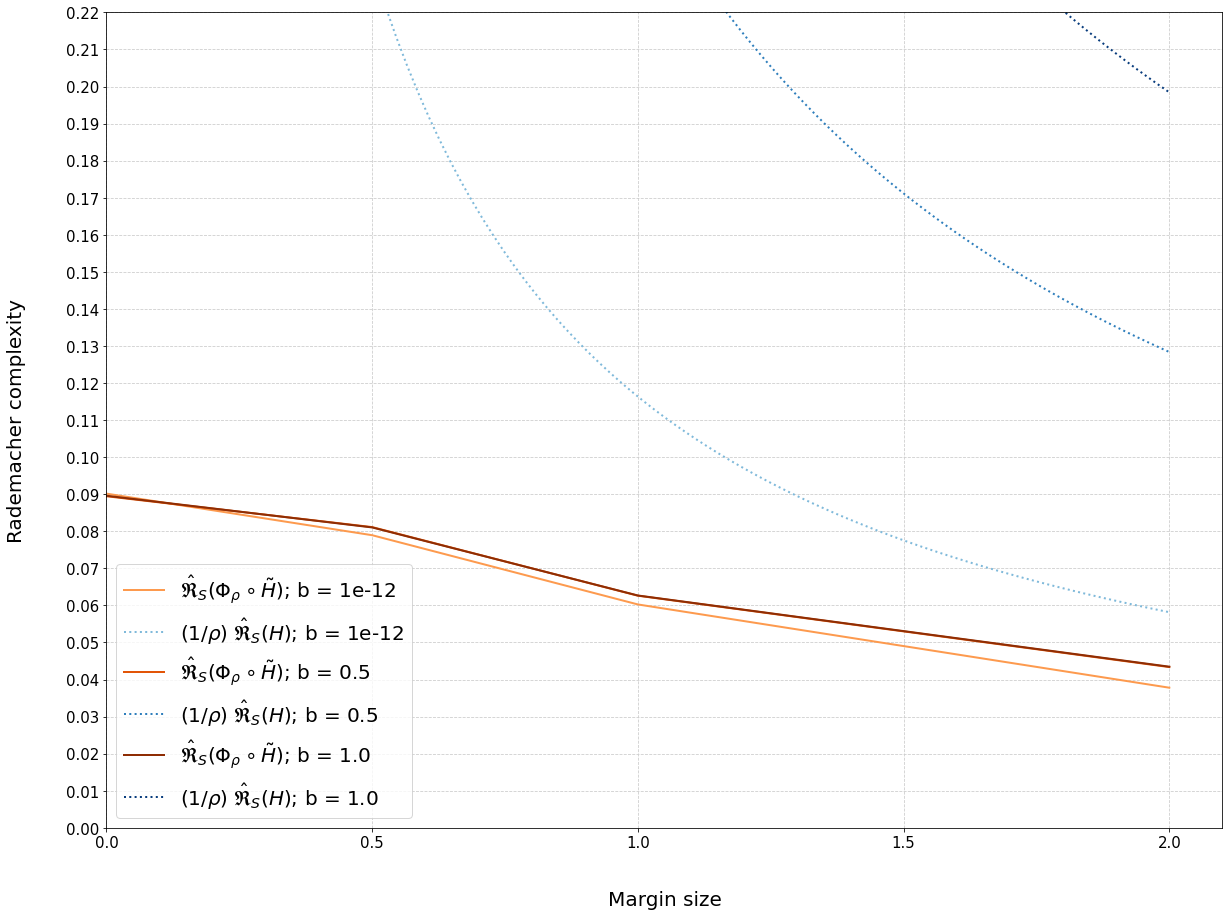

In [3]:
import matplotlib.cm as cm

BOUNDS = np.array([1e-12, 0.5, 1.0])
MARGINS = np.array([0, 0.5, 1.0, 2.0])

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=[20,15])

color_val = 0.2



for b in BOUNDS:
    color_val += 0.25
    cmain = cm.Oranges(color_val)
    csub = cm.Blues(color_val)
    
    com = []
    for mar in MARGINS:

        h = load_file("histories/RM_dynamics_air/air500_12_maxiter100_margin_loss_b" + str(b) + '_m' + str(mar))
        com.append(calc_complexity(h))

    linear_rad = calc_complexity( load_file("histories/RM_dynamics_air/air500_12_maxiter100_confidence_b"+str(b)) )
    print(linear_rad)

    plt.plot(MARGINS, com, c=cmain, lw=2, label=r'$\hat{\mathfrak{R}}_{S}(\Phi_\rho \circ \tilde{H})$; b = '+str(b))
    sp = np.linspace(0,2,100)
    yy = np.ones(len(sp)-1)*(linear_rad)/sp[1:]
    yy = np.insert(yy,0,None)
    plt.plot(sp, yy, lw=2, c=csub, label=r'$(1/\rho)\;\hat{\mathfrak{R}}_{S}(H)$; b = '+str(b), ls=':')



plt.ylim(0,0.22)
plt.xlim(0,2.1)

ax.minorticks_on()
ax.grid(True, which='both')

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.01))

ax.xaxis.set_minor_locator(AutoMinorLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.05))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':',lw=3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)

plt.xlabel("Margin size", fontsize=20, labelpad=40)
plt.ylabel("Rademacher complexity", fontsize=20, labelpad=40)
#plt.title(r'Rademacher complexity $(\mathfrak{R}_\mathfrak{m}(\Phi_\rho \circ \tilde{H}))$ versus bound $((1/\rho)\;\mathfrak{R}_\mathfrak{m}(H))$', fontsize=20, pad=40)

plt.savefig("images/AIRLINE.png", bbox_inches='tight')

plt.show()
